<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/SeATAC_Etv2_MEF_v0_4_0_Vplots_for_and_MEFs_Figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare MACS2 and SeATAC for detecting differential V-plots of ATAC-seq data between MEF and Flk1+ cells in Etv2 induced MEFs at day 7


This task runs on SeATAC `v0.4.0`

In [ ]:
start_time <- Sys.time()

### Install external packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [ ]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

### Install R packages from CRAN

In [ ]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
required_packages <- c(
  "GenomicAlignments",
  'BSgenome.Mmusculus.UCSC.mm10',
  'motifmatchr',
  'uwot',
  'igraph',
  'VennDiagram',
  'patchwork'
 )

In [ ]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BiocVersion', 'GenomicAlignments',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'uwot', 'igraph',
  'VennDiagram', 'patchwork'

also installing the dependencies ‘rjson’, ‘plyr’, ‘pracma’, ‘AnnotationDbi’, ‘xtable’, ‘R.oo’, ‘R.methodsS3’, ‘png’, ‘BiocIO’, ‘restfulr’, ‘reshape2’, ‘poweRlaw’, ‘annotate’, ‘GO.db’, ‘R.utils’, ‘KEGGREST’, ‘plogr’, ‘formatR’, ‘RCurl’, ‘GenomeInfoDbData’, ‘XVector’, ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘zlibbioc’, ‘bitops’, ‘Rhtslib’, ‘snow’, ‘BH’, ‘rtracklayer’, ‘matrixStats’, ‘caTools’, ‘CNEr’, ‘DirichletMultinomial’, ‘gtools’, ‘RSQLite’, ‘seqLogo’, ‘TFMPvalue’, ‘XML’, ‘RcppEigen’, ‘sitmo’, ‘lambda.r’, ‘futile.options’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘GenomeInfoDb’, ‘GenomicRanges’, ‘Su

In [ ]:
library(devtools)

Loading required package: usethis



### Install R packages from github

In [ ]:
install_github("GreenleafLab/chromVARmotifs")

Rcpp    (1.0.8 -> 1.0.8.3) [CRAN]
rlang   (1.0.1 -> 1.0.2  ) [CRAN]
openssl (1.4.6 -> 2.0.0  ) [CRAN]
withr   (2.4.3 -> 2.5.0  ) [CRAN]


Installing 4 packages: Rcpp, rlang, openssl, withr

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp7wBCwL/remotes56622812ac/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Install `seatac` from github

In [ ]:
install_github('gongx030/seatac', quiet = FALSE, ref = 'v0.4.0') # install from the branch v0.4.0
devtools::reload(pkgload::inst("seatac"))
library(seatac)

tfautograph  (NA -> 0.3.2 ) [CRAN]
config       (NA -> 0.3.1 ) [CRAN]
here         (NA -> 1.0.1 ) [CRAN]
RcppTOML     (NA -> 0.1.7 ) [CRAN]
zeallot      (NA -> 0.1.0 ) [CRAN]
tfruns       (NA -> 1.5.0 ) [CRAN]
tensorflow   (NA -> 2.8.0 ) [CRAN]
reticulate   (NA -> 1.24  ) [CRAN]
keras        (NA -> 2.8.0 ) [CRAN]
abind        (NA -> 1.4-5 ) [CRAN]
gplots       (NA -> 3.1.1 ) [CRAN]
tfdatasets   (NA -> 2.7.0 ) [CRAN]
tfprobabi... (NA -> 0.15.0) [CRAN]


Installing 13 packages: tfautograph, config, here, RcppTOML, zeallot, tfruns, tensorflow, reticulate, keras, abind, gplots, tfdatasets, tfprobability

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp7wBCwL/remotes56288a586a/gongx030-seatac-55f9f36/DESCRIPTION’ ... OK
* preparing ‘seatac’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘seatac_0.4.0-010.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tensorflow

Loading required package: tfprobability

Loading required package: tfdatasets

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘pa

### Load R packages

In [ ]:
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(motifmatchr)
library(chromVARmotifs)
library(igraph)
library(VennDiagram)
library(ggplot2)
library(patchwork)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit


Loading required package: rtracklayer


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, u

### TensorFlow setup

In [ ]:
gpus <- tf$config$list_physical_devices('GPU')
for (gpu in gpus){
  tf$config$experimental$set_memory_growth(gpu, TRUE)
}
logical_gpus <- tf$config$experimental$list_logical_devices('GPU')
sprintf('Physical GPUs: %d', length(gpus)) %>% message()
sprintf('Logical GPUs: %d', length(logical_gpus)) %>% message()

Loaded Tensorflow version 2.8.0

Physical GPUs: 1

Logical GPUs: 1



In [ ]:
Sys.time() - start_time

Time difference of 28.56894 mins

## Parameters

In [ ]:
ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 20L,
  window_size = 1000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 10L,
  vae_num_peaks = 5000L,
  vae_latent = c(5L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,
  padjusted_cutoff = 0.05,
  log_ratio_cutoff = 0.1,
  center_width = 100L # the center width
)

## Load data

In [ ]:
remote_bam_files = c(
  MEF_NoDox = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam',
  MEF_Dox_D7_Flk1pos = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam'
)
for (f in remote_bam_files){
  system(sprintf('wget -cx %s', f))
}
local_bam_files <- gsub('https://', './', remote_bam_files)

In [ ]:
remote_bed_files <- gsub('.bam', '_summits.bed', remote_bam_files)
for (f in remote_bed_files){
  system(sprintf('wget -cx %s', f))
}
local_bed_files <- gsub('https://', './', remote_bed_files)

### Read V-plots

In [ ]:
gr0 <- lapply(local_bed_files, function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = 200L)
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr0 <- gr0[!seqnames(gr0) %in% c('chrM', 'chrY')]
gr <- slidingWindows(gr0, width = ARGS[['block_size']], step = ARGS[['sliding_step']]) %>% unlist()
set.seed(1L); gr <- sample(gr, ARGS[['vae_num_peaks']])
counts <- count_reads(gr, local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10,  fragment_size_range = c(0, ARGS[['fragment_size_range_max']]))

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam

validate_bam | indexing bam files: ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam



In [ ]:
valid <- rowSums(counts >= ARGS[['min_reads']]) == length(local_bam_files)
gr <- gr[valid]
sprintf('number of training peaks for VaeModel: %d', length(gr)) %>% message()
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

number of training peaks for VaeModel: 4379

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam



### Training VAE model for V-plots

As of 1/20/2022, Colab had errors on the first run. Run the cell again will resolve the issue.

In [ ]:
model <- new('VaeModel', model = VaeModel(
  n_samples = dim(x)['sample'],
  latent_dim = ARGS[['vae_latent']],
  block_size = ARGS[['block_size']],
  bin_size = ARGS[['bin_size']],
  filters0 = ARGS[['vae_filters0']],
  filters = ARGS[['vae_filters']],
  upsample_layers = ARGS[['vae_upsample_layers']],
  downsample_layers = ARGS[['vae_downsample_layers']],
  fragment_size_range  = c(0, ARGS[['fragment_size_range_max']]),
  fragment_size_interval = ARGS[['fragment_size_interval']]
))
lr <- WarmUpAndCosineDecay(
  base_learning_rate = ARGS[['vae_base_learning_rate']],
  num_examples = nrow(x),
  batch_size = ARGS[['vae_batch_size']],
  epochs = ARGS[['vae_epochs']],
  warmup_epochs = as.integer(ARGS[['vae_epochs']] * ARGS[['vae_warmup_ratio']])
)
beta <- beta_schedule(
  method = ARGS[['vae_beta_schedule_method']],
  beta0 = ARGS[['vae_beta0']],
  epochs = ARGS[['vae_epochs']]
)
d <- model %>% prepare_data(x)
d <- d %>% tensor_slices_dataset()
model <- model %>% fit(d, batch_size =  ARGS[['vae_batch_size']], epochs = ARGS[['vae_epochs']], learning_rate = lr, compile = TRUE, beta = beta)

epoch=     1/   200 | beta=1.000e+00 | loss= 3392.9486189 | loss_reconstruction= 3392.4179897 | loss_kl=    0.5306369

epoch=     2/   200 | beta=1.000e+00 | loss= 2761.3911203 | loss_reconstruction= 2760.2416364 | loss_kl=    1.1494889

epoch=     3/   200 | beta=1.000e+00 | loss= 2418.3165597 | loss_reconstruction= 2416.5496861 | loss_kl=    1.7668621

epoch=     4/   200 | beta=1.000e+00 | loss= 2002.7290597 | loss_reconstruction= 2001.7376848 | loss_kl=    0.9913631

epoch=     5/   200 | beta=1.000e+00 | loss= 1458.8319441 | loss_reconstruction= 1458.2826800 | loss_kl=    0.5492747

epoch=     6/   200 | beta=1.000e+00 | loss=  924.2034947 | loss_reconstruction=  924.0178571 | loss_kl=    0.1856379

epoch=     7/   200 | beta=1.000e+00 | loss=  569.6244908 | loss_reconstruction=  569.5479039 | loss_kl=    0.0765867

epoch=     8/   200 | beta=1.000e+00 | loss=  398.5033203 | loss_reconstruction=  398.4616908 | loss_kl=    0.0416306

epoch=     9/   200 | beta=1.000e+00 | loss=  32

## Call differential Etv2 motif centric V-plots between MEF and D7 MEF by SeATAC

### Extract motif centric regions

In [ ]:
data('homer_pwms') # 321 TF motifs from Homer database

In [ ]:
j <- 82 # Etv2
homer_pwms[j]

PWMatrixList of length 1
names(1): Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)

In [ ]:
gr <- matchMotifs(homer_pwms[j], gr0, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')

In [ ]:
sprintf('number of motif-centric regions: %s', length(gr)) %>% message()

number of motif-centric regions: 20822



### Read V-plots

In [ ]:
x <- read_vplot(gr, filenames = local_bam_files, genome = BSgenome.Mmusculus.UCSC.mm10, bin_size = ARGS[['bin_size']], fragment_size_range = c(0, ARGS[['fragment_size_range_max']]), fragment_size_interval = ARGS[['fragment_size_interval']])

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_NoDox.bam

read_bam | reading ./s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/MEF_Dox_D7_Flk1pos.bam



### Get the latent representations of the V-plots

In [ ]:
x <- model %>% predict(x, batch_size = ARGS[['vae_batch_size']], vplots = TRUE)

### Testing whether the V-plots between two conditions are significantly different

In [ ]:
is_signif <- res$padj < 0.05
sprintf('# of significantly differential V-plots called by SeATAC: %d', sum(is_signif)) %>% message()

# of significantly differential V-plots called by SeATAC: 6561



#Reading the regions for VPlots

In [ ]:
remote_res <- c(res = 'https://s3.msi.umn.edu/dsouz072/projects/seatac_project/config/seatac_MEF_Etv2/name1=MEF_NoDox_name2=MEF_Dox_D7_Flk1pos/Flk1pos_Up_MEF_regions.rds')
for (f in remote_res){
  system(sprintf('wget -cx %s', f))
}
res <- gsub('https://', './', remote_res)

In [ ]:
res <- readRDS(res[['res']])

In [ ]:
sprintf('number of motif-centric regions: %s', length(res)) %>% message()

number of motif-centric regions: 20822



In [ ]:
is_signif <- res$padj < 0.05
sprintf('# of significantly differential V-plots called by SeATAC: %d', sum(is_signif)) %>% message()

# of significantly differential V-plots called by SeATAC: 6561



#SeATAC only

In [ ]:
only_seatac <- res$padj < 0.05 & res$log_ratio < -ARGS[['log_ratio_cutoff']] & !res$macs2 > -log10(ARGS[['padjusted_cutoff']]) & !(res$difference < -0.4 & res$flk1pos == TRUE)
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center for undifferentiated MEFs: %d', sum(only_seatac)) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center for undifferentiated MEFs: 2776



In [ ]:
x2 <- model %>% predict(x[only_seatac], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p1 <- vplot(x2, 'counts', ncol = 2L) +ggtitle('counts                                        SeATAC only') 
p2 <- vplot(x2, 'predicted_counts', ncol = 2L)

# MACS2 Only

In [ ]:
seatac_macs2 <- !(res$padj < 0.05 & res$log_ratio < -ARGS[['log_ratio_cutoff']]) & res$macs2 > -log10(ARGS[['padjusted_cutoff']]) & !(res$difference < -0.4 & res$flk1pos == TRUE)
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center for undifferentiated EBs and summits called by MACS2 in Flk1+ EBs at D2.5 post Etv2 induction: %d', sum(seatac_macs2)) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center for undifferentiated EBs and summits called by MACS2 in Flk1+ EBs at D2.5 post Etv2 induction: 116



In [ ]:
x3 <- model %>% predict(x[seatac_macs2], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p3 <- vplot(x3, 'counts', ncol = 2L) + ggtitle('counts                                  SeATAC & MACS2') 
p4 <- vplot(x3, 'predicted_counts', ncol = 2L)

#NucleoATAC Only

In [ ]:
seatac_nucleoatac <- !(res$padj < 0.05 & res$log_ratio < -ARGS[['log_ratio_cutoff']]) & !res$macs2 > -log10(ARGS[['padjusted_cutoff']]) &  res$difference < -0.4 
sprintf('# of Vplots that have increased nuclsoeome occupancy at the center and regions from NucleoATAC with increased nucleosome occupance for undifferentiated EBs : %d', sum(seatac_nucleoatac)) %>% message()

# of Vplots that have increased nuclsoeome occupancy at the center and regions from NucleoATAC with increased nucleosome occupance for undifferentiated EBs : 1449



In [ ]:
x4 <- model %>% predict(x[seatac_nucleoatac], batch_size = ARGS[['vae_batch_size']], vplots = TRUE)
p5 <- vplot(x4, 'counts', ncol = 2L) + ggtitle('counts                                  SeATAC & NucleoATAC') 
p6 <- vplot(x4, 'predicted_counts', ncol = 2L)

# Vplots for EBs

Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”
Warning message:
“Removed 64 rows containing missing values (geom_raster).”


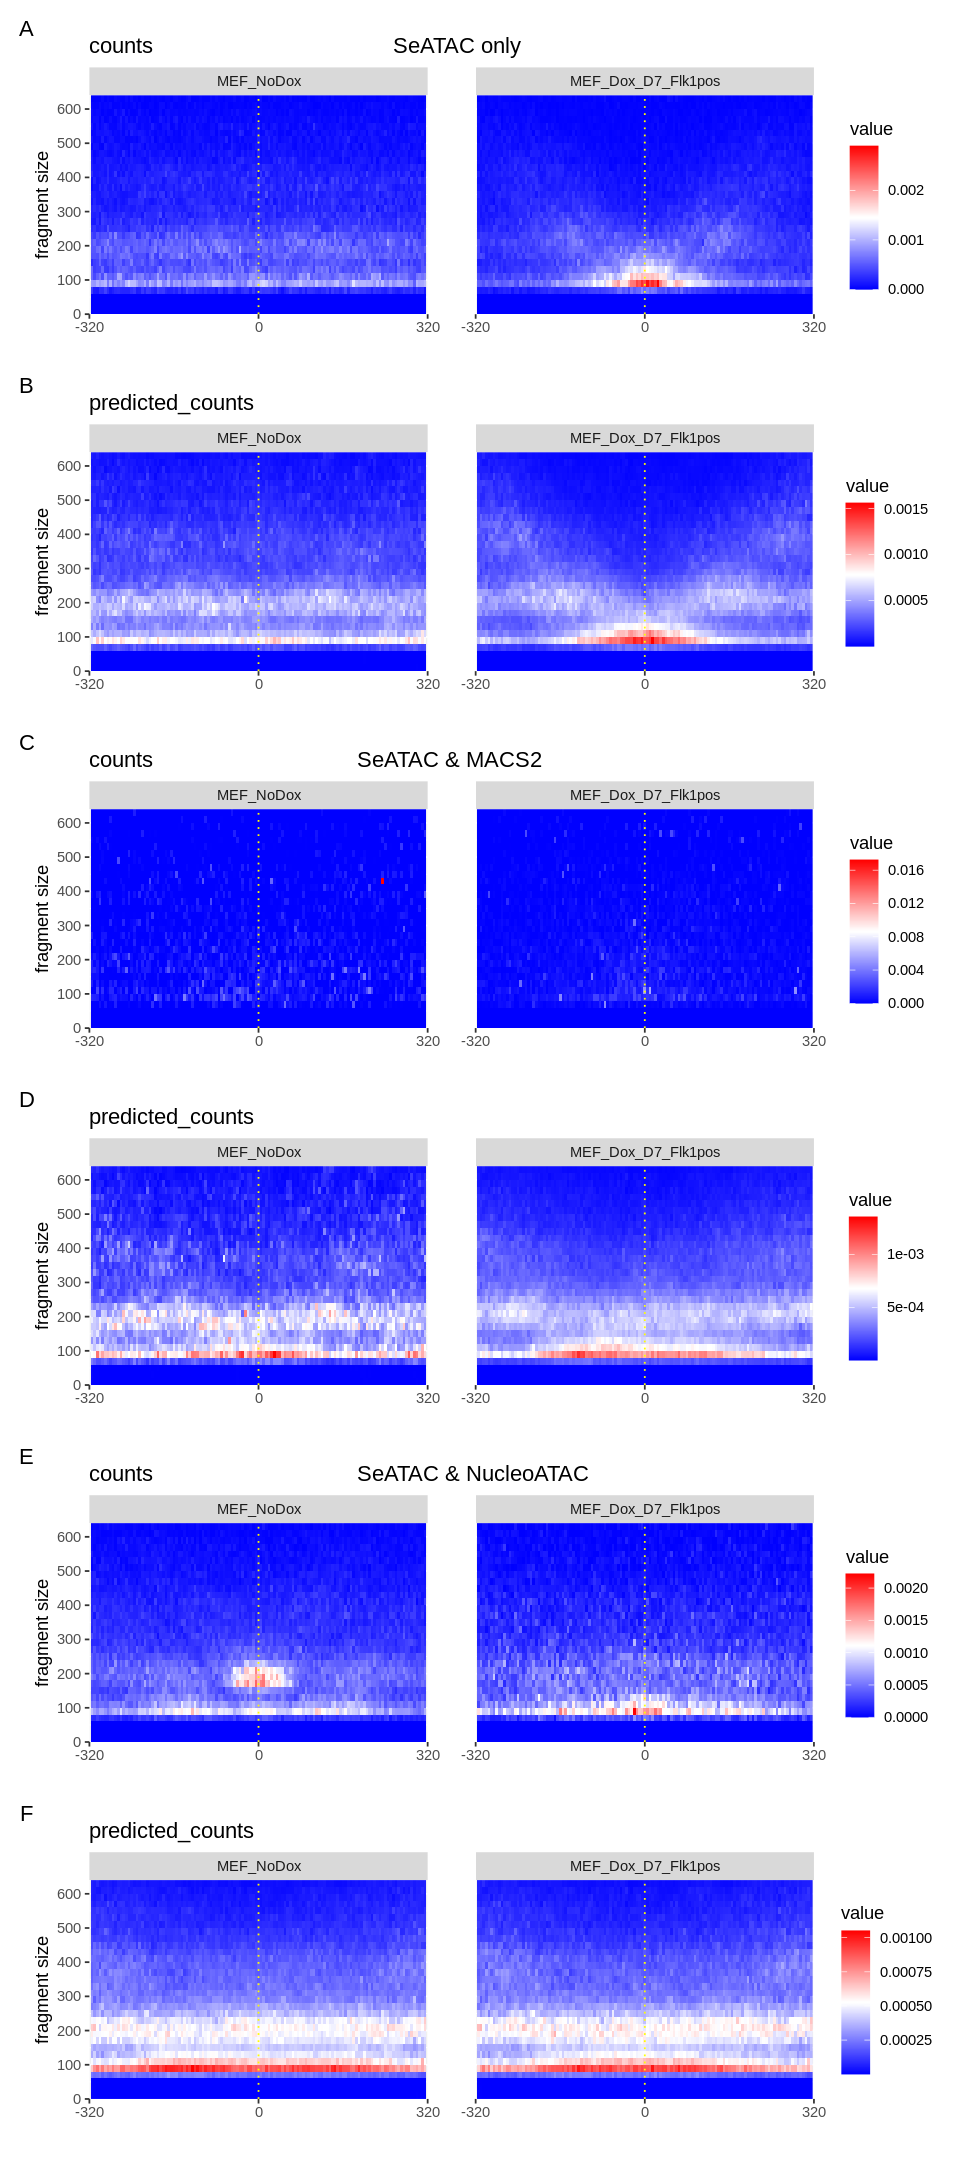

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 18)
p1 / p2 / p3/ p4 / p5 / p6 + plot_annotation(tag_levels = 'A')

## SessionInfo

In [ ]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] patchwork_1.1.1                    ggplot2_3.3.5                     
 [3] VennDiagram_1.7.1                  futile.logger_1.4.3               
 [5] igraph_1.2.11                      chromVARmotifs_0.2.0              
 [7] motifmatchr_1.16

In [ ]:
Sys.time() - start_time

Time difference of 49.17502 mins